<a href="https://colab.research.google.com/github/DHBern/dl_2022/blob/main/dhUnibe_regex_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br/><br/><br/><br/>
# **`/^[Rr]eg(ular)?\s?[Ee]xp?(res{2}ion(s)?)?$/gm`**

<br/><br/>
<img align="right" src="https://web.archive.org/web/20220614225750if_/https://i.pinimg.com/originals/da/6b/67/da6b671649885f891ab21d8d347b78e7.jpg" width="300px"/>

<br/><br/>

## Reguläre Ausdrücke, ein nützlicher Baustein zur Textmanipulation (und für viele andere Zwecke)

<br/><br/><br/><br/><br/><br/><br/>



---

##  Data literacy für Geisteswissenschaftler*innen

Peter Dängeli -- peter.daengeli@unibe.ch -- 23. Juni 2022

Walter Benjamin Kolleg der Universität Bern, Digital Humanities

---



## Einstieg

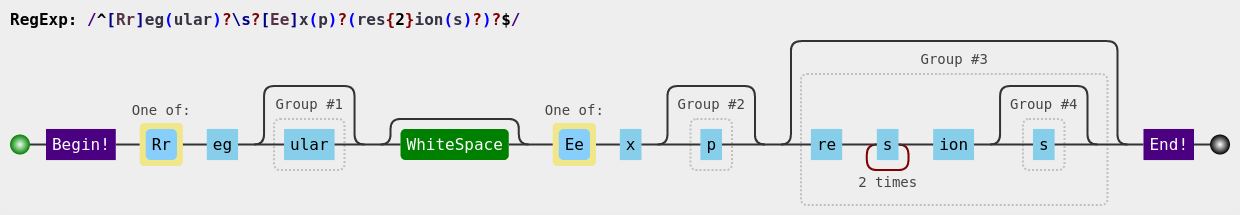

### Welche Ausdrücke entsprechen diesem Muster?

* `Regex`?
* `regex`?
* `regexs`?
* `regExp`?
* `... reg ex ...`?
* `regular expression`?
* `irregular expresion`?

## Probe aufs Exempel

Reguläre Ausdrücke sind im Kern sprachunabhängig. Da wir uns hier in einer Python-Umgebung befinden, können wir zum Testen der verschiedenen Inputs die Python-Library `re` nutzen. Sobald sie in der nächsten Zelle aktiviert wird, steht sie für alle folgenden Zellen zur Verfügung.

> Anmerkung zur Notebook-Umgebung: die grau hinterlegten Zellen enthalten i.d.R. ausführbaren Code. Die Ausführung lässt sich mit der Tastenkombination `SHIFT` + `ENTER` oder dem Play-Button auf der linken Seite starten.]



In [ ]:
import re

print(re.__name__, re.__version__, 'imported.')

> Alternativ könnten wir mit `import regex` eine etwas modernere Library einbinden. Sie ist in der Version 0 kompatibel mit `re`, verfügt in anderen Versionen aber über weiterreichende Möglichkeiten. Da unsere Anforderung hier nicht so weit gehen und sich zudem zu `re` mehr Support im Web findet, bleiben wir bei `re`.



Mit einer einfachen Regex-Funktion lässt sich ermitteln, welche der Testfälle dem Muster entsprechen und welche nicht. Der Schlüsselausdruck in der folgenden Zelle ist `re.search(pattern,line)`.

Damit wird ein Testausdruck gegen das Muster ausgewertet und das entsprechende Resultat zurückgegeben.

Für den ersten Testfall könnte die Funktion so konkretisiert werden:

In [ ]:
re.search(r'^[Rr]eg(ular)?\s?[Ee]xp?(res{2}ion(s)?)?$','regex')


Das ausgegebene Objekt `<re.Match object; span=(0, 5), match='regex'>` deutet an, dass das Muster auf den geprüften String "regex" passt.

Für das zweite Beispiel

In [52]:
re.search(r'^[Rr]eg(ular)?\s?[Ee]xp?(res{2}ion(s)?)?$','regexs')


wird hingegen kein Resultat ausgegeben. Das Muster trifft also nicht auf den Ausdruck zu.

An dieser Stelle eine kurze Information zu den im Folgenden verwendeten Python-Funktionen:

Bei der Evaluation aller Testfälle in der nächsten Zelle schummeln wir ein wenig, indem wir den Suchtext aufsplitten und die Regex-Funktion `re.search()` jeweils nur auf die einzelne Zeile anwenden. So können wir uns auf die einfacheren Funktionen `search()` und `match()` begrenzen, die sich ohne tiefere Kenntnisse relativ intuitiv nutzen lassen und die für unsere Zwecke ausreichen.

Der Unterschied dieser beiden Funktionen besteht darin, dass `match()` nur den Zeilenanfang berücksichtigt und `search()` den ganzen String durchsucht (so wie es auch der Regex-Urahn Perl defaultmässig tut). Mit Hilfe des Metacharakters `^` lässt sich der Ausdruck aber auch bei `search()` am Zeilenanfang verankern, so wie es auch bei unserem Beispielausdruck der Fall ist. Beide Funktionen begnügen sich mit einem Treffer oder genauer gesagt dem jeweils ersten Treffer.

Neben `search()` und `match()` umfasst die `re`-Library eine Reihe etwas komplexerer Funktionen, mit denen sich Inputs flexibler verarbeiten lassen und die mehr Informationen zu Matches ausgeben (z.B. `findall()`, `finditer()`, `split()`, `group()`, `groups()`). Bei ihrer Verwendung ist ein zusätzliches Splitting normalerweise nicht nötig und sie sind natürlich auch nicht auf den ersten Treffer begrenzt.

Gut zu wissen ist zudem, dass bestimmten Zeichenfolgen in Python Bedeutungen zugewiesen sind und diese mitunter mit der Regex-Syntax kollidieren können. Das kann leicht vermieden werden, indem Rohstrings an die Regex-Funktionen übergeben werden (*raw string*; Notation: `r'hier-der-string'`). Die folgenden Beispielen kommen meistens ohne `r''` aus, so dass zur besseren Lesbarkeit nur normale Strings an die Funktionen übergeben werden.

Testen wir nun also die eingangs aufgelisteten Varianten:

In [ ]:
text_to_search = '''
regex
regexs
regExp
... reg ex ...
regular expression
irregular expresion
'''

pattern = r'^[Rr]eg(ular)?\s?[Ee]xp?(res{2}ion(s)?)?$'

## we'll handle the input line by line in order to be able to use `re.search()`
lines = iter(text_to_search.splitlines())

for line in lines: 
  if line.strip(): print(re.search(pattern,line)) ## ignore empty lines with `strip()`

Dreimal trifft das Muster zu, dreimal nicht.

## Wozu soll das nun gut sein?

* Dateinamen suchen
* Datenvalidierung, z.B. E-Mail-Adressen
* Suchen und ersetzen
* Templating, Kontrollstrukturen (Programmabläufe definieren)
* Server-Redirecting, URL-Rewriting
* fuzzy search, z.B. OCR-Daten


## Was steckt dahinter?

* Konzept des ***pattern matching*** aus der Computer Science (seit den 1950ern)
   * Prüfung einer gegebenen Tokensequenz auf die Übereinstimmung mit Bestandteilen eines Musters
   * nicht das gleiche wie *pattern recognition*
   * Typische Strukturen der *pattern*:
      * Sequenzen
      * Trees
   * Typische Aktionen:
      * Ausgabe der Indexposition des Treffers
      * Ausgabe (eines Teils) der Übereinstimmung
      * Ersetzen (eines Teils) der Übereinstimmung mit einer alternativen Tokensequenz (Substitution, Suchen und Ersetzen)
   * Reguläre Ausdrücke sind eine wichtige Anwendung dieser Methode, aber keineswegs die einzige.

* **Reguläre Ausdrücke** / **RegEx**
   * Anfänge auch in den 1950ern, Boom ab ca. 1968
      * Texteditoren (`ed` (mit `g/re/p`),  `vi`, `lex`, `sed`, `AWK`, `expr`, `Emacs` usw.)
      * Compiler (lexikalische Analyse)
   * Es bestehen unterschiedliche syntaktische Ansätze; jener von Perl fand die weiteste Verbreitung (ab 1997 als `PCRE`, *Perl Compatible Regular Expressions*).
   * Fast alle Allzweck-Programmiersprachen ermöglichen die Nutzung von RegEx auf die eine oder andere Weise. Manche basieren wesentlich darauf.
      * verstärkte Standardisierungsbestrebungen seit ca. 1990 
      * Bei sehr grossen Überschneidungen bestehen auch Unterschiede zwischen Sprachen und Implementierungen (Parsern); *das* RegEx gibt es nicht.
      * In der Praxis stellen diese Unterschiede meist keine grosse Hürde dar.
   * RegEx ist auch ohne vertiefte Programmierkenntnisse ein sehr nützliches Werkzeug.

## Wie sind reguläre Ausdrücke aufgebaut?

<img src="https://web.archive.org/web/20220614225725if_/https://bird.trom.tf/pic/media%2FD-svlGFWsAErN5b.jpg%3Fname%3Dorig" width="300px" align="right"/>

Die kryptischen Ausdrücke haben mehr System, als man auf den ersten Blick meinen könnte.

Es sind vor allem die Kompaktheit und die Verschachtelung von Ausdrücken, die die Les- und Interpretierbarkeit behindern.

Mit ein paar Grundkenntnissen kommt man schon recht weit. Und wenn es etwas kniffliger wird, gibt es sehr nützliche Tools und Kurzreferenzen.

### Konfiguration der Notebook-Umgebung

Bevor wir uns um die Hauptbestandteile regulärer Ausdrücke kümmern, initialisieren wir durch Ausführen der folgenden Zellen zwei Helferfunktionen, mit denen sich die Ausdrücke einfach testen lassen.

Die erste Funktion hat den Namen `regex_run()` und sie erwartet zwei Argumente, den regulären Ausdruck (als String) und den Input, auf den der Ausdruck angewendet werden soll (als URL bzw. String).

Die zweite Funktion hat den Namen `regex_run2()` und sie funktioniert im Prinzip genau gleich. Anders als bei der ersten Funktion parst sie aber das abgerufene HTML und gibt einen Textauszug zurück.

In [ ]:
import requests

print(requests.__title__, requests.__version__, 'imported', requests.__cake__, '\n', requests.__description__, '\n', requests.__copyright__, '\n')

def regex_run(pattern,url):

  response = requests.get(url)
  data = response.text

  lines = iter(data.splitlines())

  raw_pattern = r'{}'.format(pattern)

  for idx, line in enumerate(lines): 
    # ignore empty lines
    if line.strip(): 
      # retain only the lines with a match
      if re.search(raw_pattern,line): print('L', idx), print(line)

print('Local function `regex_run()` initialised and ready.')

In [ ]:
import bs4 as bs4
from bs4 import BeautifulSoup as bsoup

print(bsoup.__name__, 'from', bs4.__name__ , bs4.__version__, 'by', bs4.__author__, 'imported.\n')

# this function is limited to the text contained in the body tag of a page

def regex_run2(pattern,url):

  response = requests.get(url)

  mysoup = bsoup(response.text, 'html.parser')

  # getting rid of some presentational and navigational information
  for tag in mysoup.find_all(['script', 'style', 'nav']):
    tag.decompose() 

  data = mysoup.find('body').getText()

  lines = iter(data.splitlines())

  raw_pattern = r'{}'.format(pattern)

  for idx, line in enumerate(lines): 
    # ignore empty lines
    if line.strip(): 
      # retain only the lines with a match
      if re.search(raw_pattern,line): print('L', idx), print(line)

print('Local function `regex_run2()` initialised and ready.')

Damit ist alles vorbereitet für den nächsten Teil.

### Hauptbestandteile

#### Sonderzeichen und reguläre Zeichen -- *metacharacters*, *regular characters*

Alles, was nicht ein Sonderzeichen ist (sowie Sonderzeichen selbst, sofern sie an bestimmten Positonen stehen), sind reguläre Zeichen, die für sich selber stehen.

<br/>

---

> **`^`**
> *Signalisiert, dass das Pattern an der ersten Indexposition des Strings beginnt, in zeilenbasierten Werkzeugen also am Zeilenanfang.*

Vergleiche den Output der beiden folgenden Zellen:



In [ ]:
regex_run2('JEAN','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

In [ ]:
regex_run2('^JEAN','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

<br/>

---
> **`$`** Signalisiert, dass das Pattern an der letzten Indexposition des Strings endet, in zeilenbasierten Werkzeugen also am Zeilenende.

In [ ]:
regex_run2('ROUSSEAU','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

In [ ]:
regex_run2('ROUSSEAU$','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

<br/>

---
> **`.`** Ein beliebiges Zeichen (i.d.R. auch Zeilenumbruch).

In [ ]:
regex_run2('Note 1.','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

<br/>

---
> **`[ ]`** Ein Zeichen aus der zwischen den Klammern eingefassten Zeichenmenge.
>
>Diese Menge kann aus einer Aufzählung oder aus einer Range (`a-z`) oder Mischungen von beidem bestehen.
>
> Der Bindestrich wird als eigenständiges Zeichen interpretiert, wenn er das erste oder letzte Zeichen im geklammerten Ausdruck ist (z.B. `[-xyz]` => `-`, `x`, `y` oder `z`).
>
>Ähnlich kann die schliessende Klammer reguläres Zeichen sein, wenn sie an erster Stelle nach der öffnenden Klammer steht (`[]abc`).

In [ ]:
regex_run2('[Rr][Eé][Pp][Uu][Bb][Ll][Ii][Qq][Uu][Ee]','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

Im folgenden Beispiel wird im Ausdruck `[sE]]` die zweite schliessende eckige Klammer literal interpretiert. Möchte man sie als Teil der alternierenden Zeichenmenge verstehen, müsste sie an erster Stelle im Ausdruck stehen: `[]sE]`. Das Resultat wäre dann viel umfangreicher, weil alle schliessenden eckigen Klammern zurückgegeben würden und nicht nur die zwei Fälle, in denen sie auf `s` oder `E` folgen.

In [ ]:
regex_run2('[sE]]','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

<br/>

---
> **`[^ ]`** Das `^`-Zeichen negiert in diesem Kontext die in der Klammer aufgeführten Zeichen.
>
>Bezeichnet wird also ein Zeichen, das nicht Teil des Klammerausdrucks ist.


Im folgenden Beispiel werden jene sechs Zeilen zurückgegeben, die einen [ ]-Klammerausdruck enthalten, der nicht mit einer Zahl endet:

In [ ]:
regex_run2('[^0-9]]','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

---
> **`( )`** Definiert einen referenzierbaren Teilausdruck (sog. *capturing group*).

> **`\n`** Gegenstück zu `( )`. Wiedergabe eines Werts aus der *n*-ten *capturing group* (sog. *backreference*).

Im folgenden Beispiel wird im Klammerausdruck der Wortteil *day* zur Wiederverwendung ausgefiltert. Die Funktion `re.sub()` ersetzt das, was im ersten Argument steht, durch das, was im zweiten steht. Dieser Subsitutionsausdruck greift mit der Referenz `\1` auf die erste (und in diesem Beispiel einzige) *capture group* zurück und setzt deren Wert an der entsprechenden Stelle ein.

In [ ]:
from datetime import date
import calendar

input = 'It is ' + calendar.day_name[date.today().weekday()] + '.'
print(input)

output = re.sub('[SMTWF][a-z]+(day)', 'a nice ' + r'\1', input)
print(output)

---
> **`|`** Alternierungsoperator; Bedeutung *entweder*`|`*oder*.

In [ ]:
regex_run2('^J’aurois|^Je n’aurois','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

##### Quantifizierung

---
> **`*`** Das direkt davorstehende Zeichen bzw. die direkt davorstehende Zeichengruppe kann beliebig oft vorkommen/wiederholt sein. Es/sie kann also auch fehlen.
 
Im folgenden Beispiel muss die Zeile mit `Le` beginnen, danach können ein oder mehrere `s` folgen, gefolgt von einem Spatium und mindestens einem Zeichen der Gruppe `[Ccho]`:

In [ ]:
regex_run2('^Les* [Ccho]+','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

---
> **`?`** Das direkt davorstehende Zeichen bzw. die direkt davorstehende Zeichengruppe kann fehlen oder einmal vorkommen. Es/sie kann also auch fehlen.

Der Output des folgenden Beispiels ist beim gegebenen Input der gleiche wie der des vorangehenden.

In [ ]:
regex_run2('^Les? [Ccho]+','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

---
> **`+`** Das direkt davorstehende Zeichen bzw. die direkt davorstehende Zeichengruppe kann einmal oder häufiger vorkommen. Es/sie kann also nicht fehlen.

Im folgenden Beispiel fällt die mit `Le ` beginnende Zeile weg, weil das `s` nicht fehlen darf:

In [ ]:
regex_run2('^Les+ [Ccho]+','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

Wie bei allen anderen Sonderzeichen, lassen sich auch die Quantifizierungszeichen als gewöhnliche Zeichen verwenden. Das geht, indem ein `\` vorangestellt wird. Hier ein Beispiel mit `\*`:

In [ ]:
regex_run2('\*','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

---
> **`{m,n}`** Präzise Vorgabe der Häufigkeiten durch Angabe der unteren und oberen Grenze, getrennt durch ein Komma.

In den folgenden beiden Beispielen werden Zeilen ausgegeben, die mit genau einem Grossbuchstaben beginnen, gefolgt von einem Spatium, bzw. Zeilen, die mit einem zwischen 10 und 15 Zeichen langen Wort beginnen:

In [ ]:
regex_run2('^[A-Z]{1} ','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

In [ ]:
regex_run2('^[A-z]{10,15}','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

##### Zusammenfassung Metacharakter

|Meta-<br/>charakter|Kurzbeschreibung|
|:---|:---|
|`^`|Signalisiert, dass das Pattern an der ersten Indexposition des Strings beginnt, in zeilenbasierten Werkzeugen also am Zeilenanfang.|
|`$`|Signalisiert, dass das Pattern an der letzten Indexposition des Strings endet, in zeilenbasierten Werkzeugen also am Zeilenende.|
|`.`|Ein beliebiges Zeichen (i.d.R. auch Zeilenumbruch).|
|`[ ]`|Ein Zeichen aus der zwischen den Klammern eingefassten Zeichenmenge.<br/><br/>Diese Menge kann aus einer Aufzählung oder aus einer Range (`a-z`) oder Mischungen von beidem bestehen.<br/><br/>Der Bindestrich wird als eigenständiges Zeichen interpretiert, wenn er das erste oder letzte Zeichen im geklammerten Ausdruck ist (z.B. `[-xyz]` => `-`, `x`, `y` oder `z`).<br/><br/>Ähnlich kann die schliessende Klammer reguläres Zeichen sein, wenn sie an erster Stelle nach der öffnenden Klammer steht (`[]abc`).|
|`[^ ]`|Das `^`-Zeichen negiert in diesem Kontext die in der Klammer aufgeführten Zeichen.<br/><br/>Bezeichnet wird also ein Zeichen, das nicht Teil des Klammerausdrucks ist.|
|`
|`( )`|Definiert einen referenzierbaren Teilausdruck (sog. *capturing group*).|
|`\n`|Gegenstück zu `( )`. Wiedergabe eines Werts aus der *n*-ten *capturing group*. Sog. *backreference*.|
|`\|`|Alternierungsoperator; Bedeutung *entweder*`\|`*oder*.|
|`*`|Das direkt davorstehende Zeichen bzw. die direkt davorstehende Zeichengruppe kann beliebig oft vorkommen/wiederholt sein. Es/sie kann also auch fehlen.|
|`?`|Das direkt davorstehende Zeichen bzw. die direkt davorstehende Zeichengruppe kann fehlen oder einmal vorkommen. Es/sie kann also auch fehlen.|
|`+`|Das direkt davorstehende Zeichen bzw. die direkt davorstehende Zeichengruppe kann einmal oder häufiger vorkommen. Es/sie kann also nicht fehlen.|
|`{m,n}`|Präzise Vorgabe der Häufigkeiten durch Angabe der unteren und oberen Grenze, getrennt durch ein Komma.|

#### Zeichenklassen

Neben der buchstäblichen Übereinstimmung, die in den bisherigen Beispieln jeweils zum Einsatz kam (z.B. `ROUSSEAU`), stellen Zeichenklassen das zweite grundlegende Konzept dar.

Wir schauen uns nur einige der naheliegendsten Klassen an. Bei komplexerem Matching-Bedarf lohnt sich ein Blick in die Kurzreferenzen meistens, denn es gibt viele verschiedene Klassen, auf die zurückgegriffen werden kann (z.B. Eingrenzung von Zeichensätzen für bestimmte Sprachen oder Schriftsysteme).

---
> **`\d`** Zahl; entspricht `[0-9]`
>
> **`\D`** keine Zahl; entspricht `[^0-9]`

Das folgende Beispiel ermittelt Zeilen, die mit einer Zahl beginnen:

In [ ]:
regex_run2('^\d','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')


Das folgende Beispiel ermittelt jene [ ]-Klammerausdrücke, die keine Zahl enthalten:

In [ ]:
regex_run2('\[\D+\]','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

---
> **`\s`** Leerraum, *whitespace*; entspricht `[ \t\r\n\v\f]`
>
> **`\S`** Kein Leerraum, *non-whitespace*; entspricht `[^ \t\r\n\v\f]`



Mit `\s` lassen sich z.B. zwei aufeinanderfolgende Leerzeichen aufspüren:

In [ ]:
regex_run2('\s{2}','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

Nach einem Semikolon erwartet man i.d.R. ein Spatium. Der Ausdruck `;\S` bringt zutage, dass an einer Stelle ein Semikolon nicht von Leerraum gefolgt ist:

In [ ]:
regex_run2(';\S','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

---
> **`\w`** Zeichen, das als Bestandteil eines Wortes gilt; entspricht `[A-Za-z0-9_]`
> 
> **`\W`** Zeichen, das nicht als Bestandteil eines Wortes gilt; entspricht `[^ A-Za-z0-9_]`

Im folgenden Beispiel werden Zeilen abgefragt, die mit einem Wort-Zeichen enden, also nicht mit einem Punktuationszeichen, Leerraum o.ä.:

In [ ]:
regex_run2('\w$','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

Im folgenden Beispiel werden Zeilen ermittelt, die nicht mit einem Wortzeichen beginnen:

In [ ]:
regex_run2('^\W','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

---
> **`\b`** Wortgrenze; Transitionspunkt von `\W` zu `\w` oder umgekehrt (Leerzeichen müssen also keine Rolle spielen)
>
> **`\B`** Keine Wortgrenze, d.h. Binnenposition in einem Wort

Mit `\b` lassen sich ganze Wörter aufspüren, z.B. `[Cc]itoyen`:

In [ ]:
regex_run2(r'\b[Cc]itoyen\b','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

Ob das Wort auch mit einer Vorsilbe vorkommt, lässt sich mit `\B` prüfen:

In [ ]:
regex_run2(r'\B[Cc]itoyen\b','https://www.rousseauonline.ch/Text/discours-sur-l-origine-et-les-fondemens-de-l-inegalite-parmi-les-hommes.php')

##### Zusammenfassung Zeichenklassen

|Zeichen-<br/>klasse|Kurzbeschreibung|
|:---|:---|
|`\d`|Zahl; entspricht `[0-9]`|
|`\D`|keine Zahl; entspricht `[^0-9]`|
|`\s`|Leerraum, whitespace; entspricht `[ \t\r\n\v\f]`|
|`\S`|Kein Leerraum, non-whitespace; entspricht `[^ \t\r\n\v\f]`|
|`\w`|Zeichen, das als Bestandteil eines Wortes gilt; entspricht `[A-Za-z0-9_]`
|`\W`|Zeichen, das nicht als Bestandteil eines Wortes gilt; entspricht `[^ A-Za-z0-9_]`|
|`\b`|Wortgrenze; Transitionspunkt von `\W` zu `\w` oder umgekehrt (Leerzeichen müssen also keine Rolle spielen)|
|`\B`|keine Wortgrenze, d.h. Binnenposition in einem Wort|


#### Eifrig oder faul? *Greedy or lazy?*

Im Zusammenhang mit den oben behandelten Quantifiern gibt es zwei Verhaltensweisen, die zu unterscheiden sind: *greediness* und *lazyness*.

Mit einem zusätzlichen `?` lässt sich steuern, ob ein Ausdruck möglichst viele Zeichen einrahmen soll oder möglichst wenige.

|greedy|lazy|Beschreibung|
|------|----|------------|
|`*`   |`*?`|0 oder mehr |
|`+`   |`+?`|1 oder mehr |
|`?` 	 |`??`|0 oder 1    |
|`{n}` |`{n}?`|exakt n   |
|`{n,}`|`{n,}?`|n oder mehr|
|`{n,m}`|`{n,m}?`|zwischen n und m|

Vergleiche zur Illustration die folgenden beiden Beispiele:


In [ ]:
re.search('R.*u','Rousseau')

In [ ]:
re.search('R.*?u','Rousseau')

## Übungen


<img src="https://web.archive.org/web/20220614230428if_/https://external-preview.redd.it/RH7qATZ6B5Ki3BklEojqUmm2LN2NC_80HgvlKgCMons.jpg?auto=webp&s=ff3680c71ffbb952e3e506277b4196444a959efa" width="300" align="right"/>
Mit den Metacharaktern, den Zeichenklassen sowie dem Lazyness-Marker `?` haben wir nun die wichtigsten Zutaten für den Regex-Zeichensalat...

### (1) Was steckt im Regex aus dem Notebook-Titel?

`^[Rr]eg(ular)?\s?[Ee]x(p)?(res{2}ion(s)?)?$`

* Lassen sich jetzt die Beispiele aus [dem Eingangsbeispiel](https://colab.research.google.com/drive/1hybJXWuUOfOyqfPl_-0GLK4Su7qr8jvl#scrollTo=aeHDbkcqRdHa) nachvollziehen?

In [ ]:
text_to_search = '''
regex
regexs
regExp
... reg ex ...
regular expression
irregular expresion
'''

# the flag re.VERBOSE allows to intersperse comments; this is helpful for more complex expressions
pattern = r'''
^                # Anchored at the beginning of the string
[Rr]             # One of capital or lower case letter 'r'
eg               # Lower case letters 'e' and 'g' (compulsory)
(ular)?          # Letters 'ular' optional 
\s?              # Zero or one whitespace characters
[Ee]             # One of capital or lower case letter 'e'
x                # Letter 'x' compulsory
p?               # Letter 'p' optional
(res{2}ion(s)?)? # Optional substring 'ression|ressions'
$                # Anchored at end of the string
'''

## we'll handle the input line by line in order to be able to use `re.search()`
lines = iter(text_to_search.splitlines())

for line in lines: 
  if line.strip(): print(re.search(pattern,line,re.VERBOSE)) ## ignore empty lines with `strip()`

### (2) Wordle, anyone?

Wie kann RegEx beim Auflösen eines Wordle-Rätsels helfen?

* Spiel starten, z.B. https://wordle.berknation.com/
* Erlaubte Wörter als Input nehmen, der mit einem regulären Ausdruck immer weiter gefiltert werden kann.
* Erspielte Hinweise möglichst gut in einem regulären Ausdruck beschreiben.
   * Alternativen `[abc]`
   * Negation `[^ xyz]`
   * Gesicherte Positionen

Der Code in der nächsten Zelle kann als Ausgangspunkt dienen:

In [ ]:
regex_run('[a-z][a-z][a-z][a-z][a-z]','https://raw.githubusercontent.com/tabatkins/wordle-list/main/words')

### (3) Digitale Editionen untersuchen

* Königsfelder Urkunden

  <details><summary>Beispielaufrufe</summary>

  * `regex_run('https?://','https://www.koenigsfelden.uzh.ch/exist/apps/ssrq/docs/AA_0429_0296a.xml')`
  *  `regex_run2('\d{4}','https://www.koenigsfelden.uzh.ch/exist/apps/ssrq/docs/AA_0429_0296a.xml')`

  </details>

* Dietrich-Edition

  <details><summary>Beispielaufruf</summary>

  * `regex_run2('.','http://www.dietrich-edition.unibe.ch/band_06/einsiedeln_120.html')`

  </details>

* Lokalbericht-Edition

  <details><summary>Beispielaufruf</summary>

  * `regex_run2('.','http://www.lokalbericht.ch/LB.TEIL1.0010-l')`

  </details>


## Literatur, Kurzreferenzen

Grundlagen, Tricks, Idiome, Limitationen, Unterschiede zwischen Impelementierungen u.v.m.

* Jeffrey E. F. Friedl, *Mastering Regular Expressions, Powerful Techniques for Perl and Other Tools*, O'Reilly Media
* Jan Goyvaerts, *Regular Expressions. The Complete Tutorial*, regular-expressions.info
* Zsolt Nagy, *Regex Quick Syntax Reference. Understanding and Using Regular Expressions*, APress
* Tony Stubblebine, *Regular Expression Pocket Reference: Regular Expressions for Perl, Ruby, PHP, Python, C, Java and .NET*, O'Reilly Media

*Vor einem evtl. Kauf lassen sich einige dieser Publikationen unter [https://doc.lagout.org/programmation/Regular%20Expressions/](http://web.archive.org/web/20220601011957/https://doc.lagout.org/programmation/Regular%20Expressions/) einsehen.*

* Verschiedene docsets für Dokumentationsbrowser wie Zeal, Zest, dasht, Dash, DevDocs usw. finden sich im Web.



## Tools

* Railroad-Diagramme
   * https://jex.im/regulex
   * https://regexper.com/

* Interaktives Tutorial
   * https://regexone.com 

* Regex-Baukästen
   * https://regex101.com/
   * https://regexr.com

* Fun
   * https://regexcrossword.com/
   * https://alf.nu/RegexGolf?

## Ferner



*   `regex` statt `re`: die erweiterten Möglichkeiten der aktuelleren `regex`-Library (z.B. *fuzzy matching*) sind in diesem Notebook gut beschrieben: https://github.com/rexdwyer/Splitsville/blob/master/Splitsville.ipynb

* Was hat es mit dem wohl bekanntesten Zitat zu Regex auf sich?
  > Some people, when confronted with a problem, think "I know, I'll use regular expressions." Now they have two problems. (Jamie Zawinski, 1997)
  
  Dieser Blogpost klärt auf: http://regex.info/blog/2006-09-15/247


* Wer mag, kann mit einer weiteren Funktion experimentieren: `regex_run3()`. Diese Funktion macht eine etwas cleverere Inhaltsextraktion aus HTML.

  Ihre Installation ist etwas aufwändiger, weil die (sehr interessante und DH-nahe) `trafilatura`-Library aus einem externen Repository geladen werden muss. Nach erfolgter Installation muss daher die Runtime des Notebooks neu gestartet werden. Das ist keine grosse Sache, führt aber dazu, dass einige Befehle von oben noch einmal ausgeführt werden müssen, bevor sich `regex_run()` und `regex_run2()` wieder ausführen lassen.


In [ ]:
!pip install -U git+https://github.com/adbar/trafilatura.git

In [ ]:
import trafilatura

print(trafilatura.__name__, trafilatura.__version__, 'by', trafilatura.__author__, 'imported.\n')

import re

print(re.__name__, re.__version__, 'imported.\n')

def regex_run3(pattern,url):

  response = trafilatura.fetch_url(url)

  data = trafilatura.extract(response)

  lines = iter(data.splitlines())

  raw_pattern = r'{}'.format(pattern)

  for idx, line in enumerate(lines): 
    # ignore empty lines
    if line.strip(): 
      # retain only the lines with a match
      if re.search(raw_pattern,line): print('L', idx), print(line)

print('Local function `regex_run3()` initialised and ready.')
